# SpaceX  Falcon 9 First Stage Landing Prediction
## Part 5: Exploratory Data Analysis with Visualization
***
### Objectives
*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering
***
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

Load SpaceX datatset from part 3

In [2]:
df=pd.read_csv('03_dataset.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,7197.514904,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` and `PayloadMass` variables affect the launch outcome. We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch.

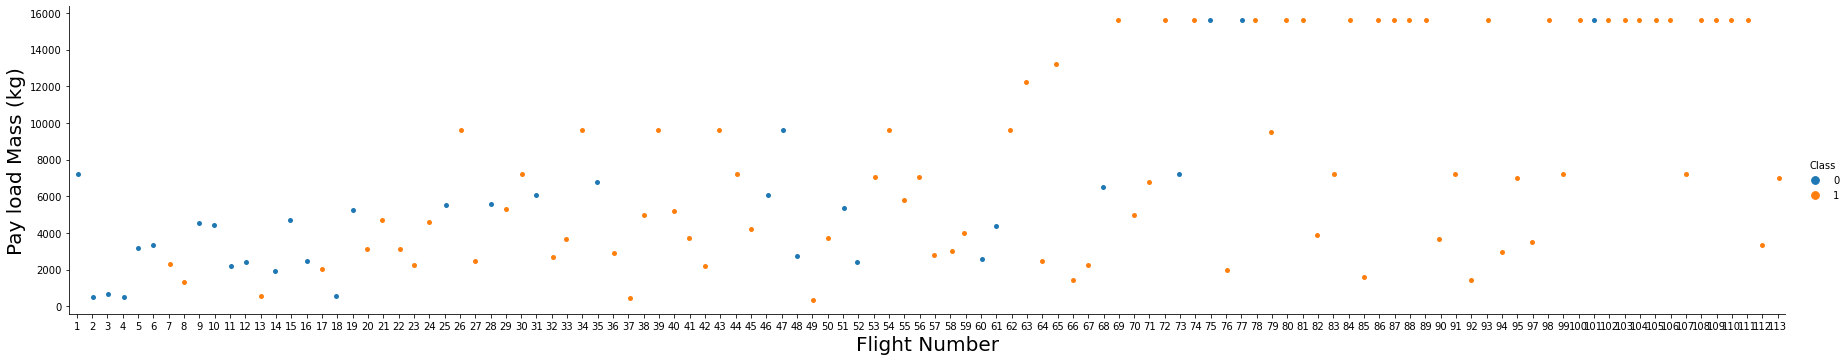

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

Next, let's drill down to each site and visualize its detailed launch records.

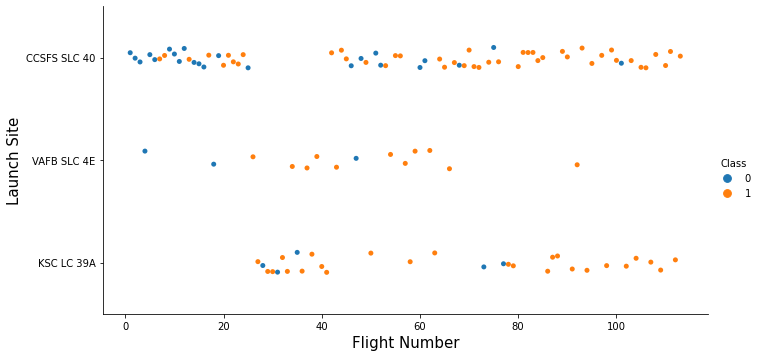

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40 has a lower success rate than KSC LC-39A and VAFB SLC 4E.

We also want to observe if there is any relationship between launch sites and their payload mass.


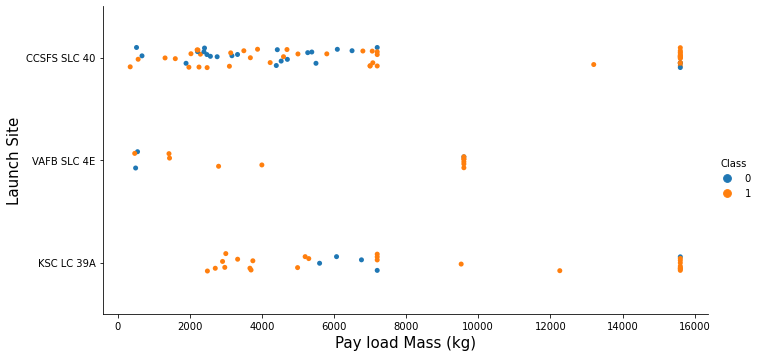

In [5]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect = 2)
plt.ylabel("Launch Site",fontsize=15)
plt.xlabel("Pay load Mass (kg)",fontsize=15)
plt.show()

We see that for the VAFB-SLC 4E launch site there are no  rockets  launched for heavy payload mass (greater than 10,000) and the CCSFS SLC 40 site has a lower success rate for light payload mass (less than 10,000).

Next, we want to visually check if there are any relationship between success rate and orbit type.


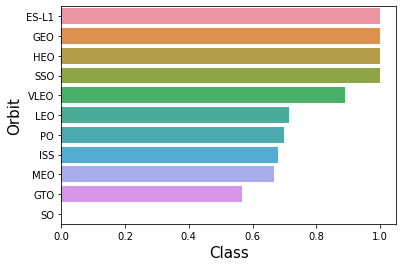

In [6]:
orbit_success = df.groupby(['Orbit']).mean().sort_values(by='Class', ascending=False).reset_index()
sns.barplot(x='Class', y='Orbit', data=orbit_success)
plt.ylabel("Orbit",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.show()

The ES-L1, GEO, HEO, and SSO orbits have a 100% success rate, while GTO has the lowest success rate. 

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


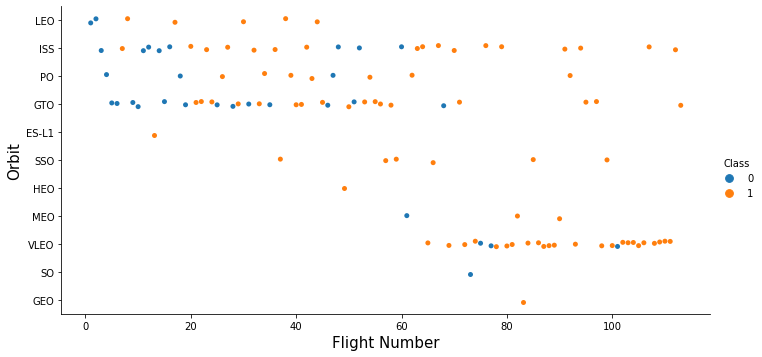

In [7]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect = 2)
plt.ylabel("Orbit",fontsize=15)
plt.xlabel("Flight Number",fontsize=15)
plt.show()

For the LEO, ISS, and PO orbits, success appears to be related to the number of flights. On the other hand, there seems to be no relationship between flight number when in GTO orbit. We also see that three of the orbits with success rates of 100%, ES-L1, HEO, and GEO, only have one flight.

We can plot the Payload vs. Orbit scatterplot to reveal the relationship between Payload and Orbit type.

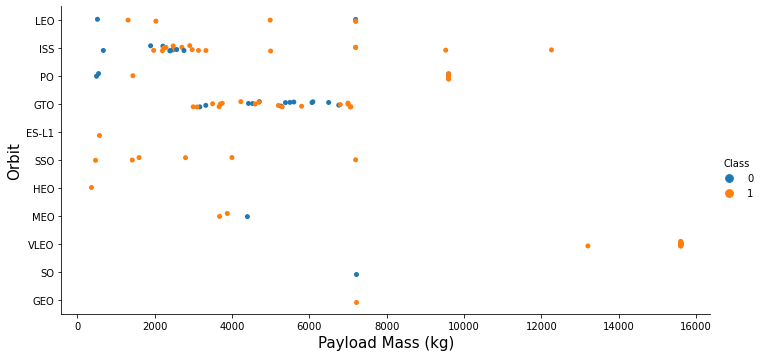

In [8]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect = 2)
plt.ylabel("Orbit",fontsize=15)
plt.xlabel("Payload Mass (kg)",fontsize=15)
plt.show()

The LEO, ISS, and PO orbits are more successful With heavy payloads. For the GTO orbit, we cannot distinguish a correlation as there is no pattern between successful and unsuccessful missions.

Let's observe the mission success rate over time. 

/var/folders/75/xf0bc_w13_l1hgbk2ljvmjf40000gn/T/ipykernel_8220/1539803558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success_rate['Date'] = Extract_year(df['Date'])


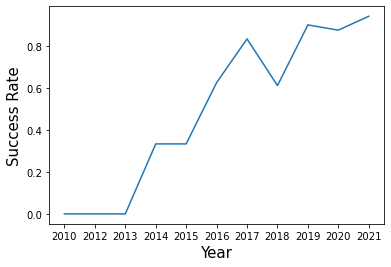

In [9]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df_success_rate = df[['Date', 'Class']]
df_success_rate['Date'] = Extract_year(df['Date'])
df_success_rate = df_success_rate.groupby(['Date']).mean().reset_index()
df_success_rate.columns=['Year', 'Success Rate']

sns.lineplot(x='Year', y='Success Rate', data=df_success_rate)
plt.ylabel("Success Rate",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

We see that the sucess rate from 2013 to 2021 has generally increased

### Features Engineering

Now that we have obtained some preliminary insights into how each variable affects the success rate, we will select the features that will be used for success prediction in the future module.

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,7197.514904,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


We should convert categorical columns to dummy values so they are ready for modelling.

In [11]:
orbits_dummies = pd.get_dummies(features.Orbit, prefix='Orbit')
launchsite_dummies = pd.get_dummies(features.LaunchSite, prefix='LaunchSite')
landingpad_dummies = pd.get_dummies(features.LandingPad, prefix='LandingPad')
serial_dummies = pd.get_dummies(features.Serial, prefix='Serial')

features_one_hot = features.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1)
features_one_hot = pd.concat([features_one_hot, orbits_dummies, launchsite_dummies, landingpad_dummies, serial_dummies], axis=1)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1,7197.514904,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our <code>features_one_hot</code> dataframe only contains numbers, let's cast the entire dataframe to variable type <code>float64</code>.

In [12]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1.0,7197.514904,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,109.0,15600.000000,9.0,1.0,1.0,1.0,5.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,110.0,15600.000000,10.0,1.0,1.0,1.0,5.0,11.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,111.0,15600.000000,2.0,1.0,1.0,1.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110,112.0,3328.000000,1.0,1.0,0.0,1.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Lastly, we can now export the dataframe to a <b>CSV</b> for the next section.

In [13]:
features_one_hot.to_csv('05_dataset.csv', index=False)